# Importing modules

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

# Cleaning Dataset

In [41]:
df = pd.read_csv('lung_cancer_survey.csv')

# df.info()

# df.describe()

# Checking for missing values
# df.isnull().sum()

# Dropping missing rows
df = df.dropna()
# df.info()
# df.describe()


# EDA

Based on the columns, we can split the data into 4 categories:
1. Demographic Variables
`GENDER`, `AGE`, `PEER_PRESSURE` <br>
Exploring possible correlations between demographic factors, symptoms, risk factors and lung cancer outcome.

2. Symptoms
`YELLOW_FINGERS`, `WHEEZING`, `COUGHING`, `SHORTNESS OF BREATH`, `SWALLOWING DIFFICULTY`, `CHEST PAIN` <br>
Examination of how different symptoms correlate with lung cancer diagnoses.

3. Risk Factors
`SMOKING`, `ANXIETY`, `CHRONIC DISEASE`, `FATIGUE`, `ALLERGY`, `ALCOHOL CONSUMING` <br>
Assess how lifestyle or pre exiting conditions contribute to lung cancer.

4. Outcome
`LUNG_CANCER`

# Possible Key Messages
1. General Demographic Trends

2. Smoking as Risk Factor

3. Symptom Analysis
- Highlight key symptoms that are prevalent among lung cancer patients

## General Demographic Trends

In [ ]:
profile = ProfileReport(df)

profile.to_notebook_iframe()

In [ ]:
# Grouping data based on the key messages for visualizations

# General Demographic Trends
# Group by gender and lung cancer status to visualize trends
gender_lung_cancer = df.groupby(['GENDER', 'LUNG_CANCER']).size().reset_index(name='Count')

# Group by age and lung cancer status for age distribution
age_lung_cancer = df.groupby(['AGE', 'LUNG_CANCER']).size().reset_index(name='Count')

# Smoking as a Risk Factor
# Group by smoking status and lung cancer status
smoking_lung_cancer = df.groupby(['SMOKING', 'LUNG_CANCER']).size().reset_index(name='Count')

# Symptom Analysis
# Count of symptoms prevalent among lung cancer patients
symptoms = ['COUGHING', 'WHEEZING', 'SHORTNESS OF BREATH', 'CHEST PAIN', 'SWALLOWING DIFFICULTY']
symptoms_lung_cancer = df[symptoms + ['LUNG_CANCER']].groupby('LUNG_CANCER').sum()

# Visualizations

# Plot 1: Lung Cancer Prevalence by Gender
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_lung_cancer, x='GENDER', y='Count', hue='LUNG_CANCER', palette='coolwarm')
plt.title('Lung Cancer Prevalence by Gender', fontsize=14)
plt.xlabel('Gender (0 = Female, 1 = Male)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Lung Cancer', loc='upper right')
plt.tight_layout()
plt.show()

# Plot 2: Age Distribution by Lung Cancer Status
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='AGE', hue='LUNG_CANCER', multiple='stack', kde=True, palette='Set2')
plt.title('Age Distribution by Lung Cancer Status', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Lung Cancer', loc='upper right')
plt.tight_layout()
plt.show()

# Plot 3: Lung Cancer Prevalence by Smoking Status
plt.figure(figsize=(8, 6))
sns.barplot(data=smoking_lung_cancer, x='SMOKING', y='Count', hue='LUNG_CANCER', palette='Set1')
plt.title('Lung Cancer Prevalence by Smoking Status', fontsize=14)
plt.xlabel('Smoking Status (0 = Non-Smoker, 1 = Smoker)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Lung Cancer', loc='upper right')
plt.tight_layout()
plt.show()

# Plot 4: Symptom Prevalence among Lung Cancer Patients
plt.figure(figsize=(8, 6))
symptoms_lung_cancer.T.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Symptom Prevalence among Lung Cancer Patients', fontsize=14)
plt.xlabel('Symptoms', fontsize=12)
plt.ylabel('Count of Symptoms', fontsize=12)
plt.legend(title='Lung Cancer (0 = No, 1 = Yes)', loc='upper right')
plt.tight_layout()
plt.show()



In [ ]:
sns.countplot(x='SMOKING', hue='LUNG_CANCER', data=df)
plt.title('Smoking vs Lung Cancer')
plt.show()

risk_factors = ['ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'ALCOHOL CONSUMING']

for factor in risk_factors:
    plt.figure()
    sns.countplot(x=factor, hue='LUNG_CANCER', data=df)
    plt.title(f'{factor} vs Lung Cancer')
    plt.show()

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap of Risk Factors and Lung Cancer')

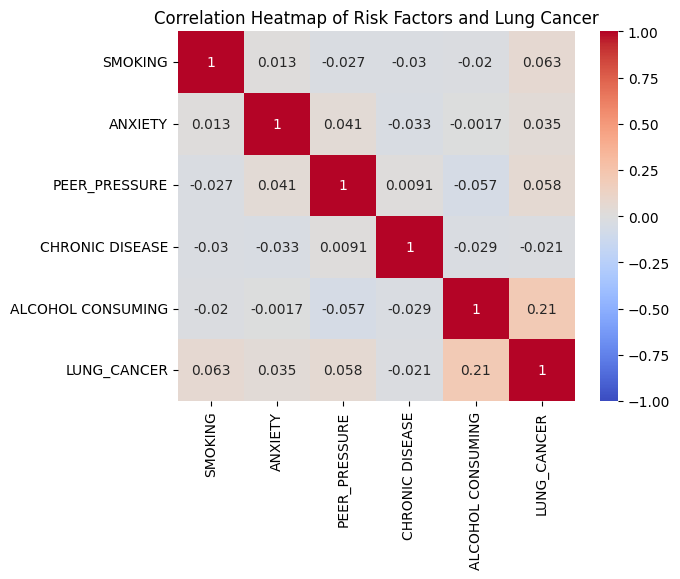

In [9]:
# Compute the correlation matrix for risk factors and lung cancer
correlation_matrix = df[['SMOKING', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 
                         'ALCOHOL CONSUMING', 'LUNG_CANCER']].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Risk Factors and Lung Cancer')
plt.show()

In [ ]:
sns.pairplot(df, vars=['SMOKING', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 
                       'ALCOHOL CONSUMING'], hue='LUNG_CANCER')
plt.show()


# Smoking vs Lung Cancer 
1. Boxplots: Understand distributions of continuous variables (like age) across categories.
2. Facet Grid: Compare the distribution of one variable across subsets.
3. Stacked bar charts: Visualize proportions of categorical data.
4. Proportion heatmaps: Visualize counts or proportions of categorical combinations.

In [ ]:
# Smoking and Age
sns.boxplot(x='SMOKING', y='AGE', data=df)
plt.title('Distribution of Age by Smoking Status')
plt.show()

#FacetGrid of Age and Lung Cancer by Smoking
g = sns.FacetGrid(df, col="SMOKING", hue="LUNG_CANCER")
g.map(sns.histplot, "AGE", kde=True).add_legend()
g.fig.suptitle('Age Distribution by Smoking and Lung Cancer Status')
plt.tight_layout()
plt.show()

# Create a cross-tab to count occurrences
smoking_lung_cancer = pd.crosstab(df['SMOKING'], df['LUNG_CANCER'], normalize='index')

# Plot a stacked bar chart
smoking_lung_cancer.plot(kind='bar', stacked=True)
plt.title('Smoking and Lung Cancer Proportion')
plt.ylabel('Proportion')
plt.show()

<Axes: xlabel='LUNG_CANCER', ylabel='SMOKING-ANXIETY-PEER_PRESSURE'>

Text(0.5, 1.0, 'Heatmap of Risk Factors and Lung Cancer')

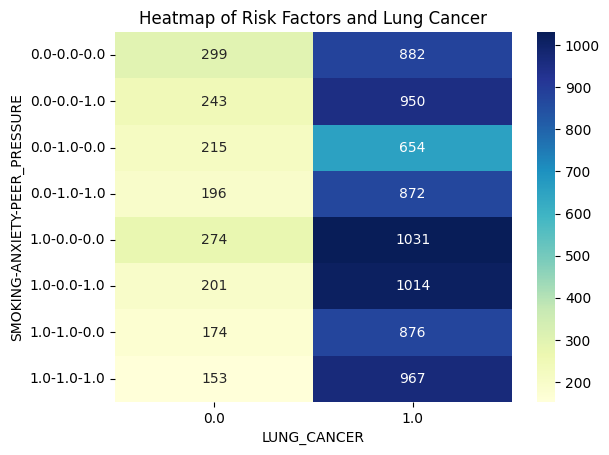

In [21]:
# Create a cross-tab for categorical variables
heatmap_data = pd.crosstab([df['SMOKING'], df['ANXIETY'], df['PEER_PRESSURE']], df['LUNG_CANCER'])

# Plot the heatmap
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Risk Factors and Lung Cancer')
plt.show()

# Alcohol Consumption vs Lung Cancer
1. Boxplots: Understand distributions of continuous variables (like age) across categories.
2. Facet Grid: Compare the distribution of one variable across subsets.
3. Stacked bar charts: Visualize proportions of categorical data.
4. Proportion heatmaps: Visualize counts or proportions of categorical combinations.

<Axes: xlabel='ALCOHOL CONSUMING', ylabel='AGE'>

Text(0.5, 1.0, 'Age Distribution by Alcohol Consumption')

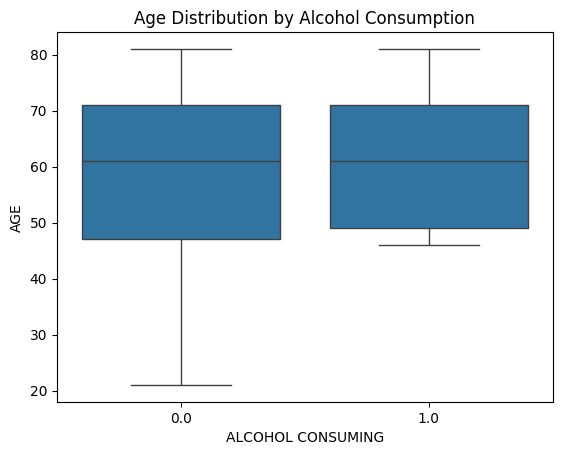

Text(0.5, 0.98, 'Age Distribution by Alcohol Consumption and Lung Cancer Status')

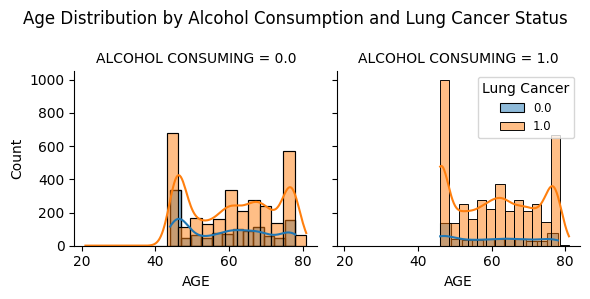

Text(0.5, 0.98, 'Age Distribution by Smoking and Alcohol Consumption')

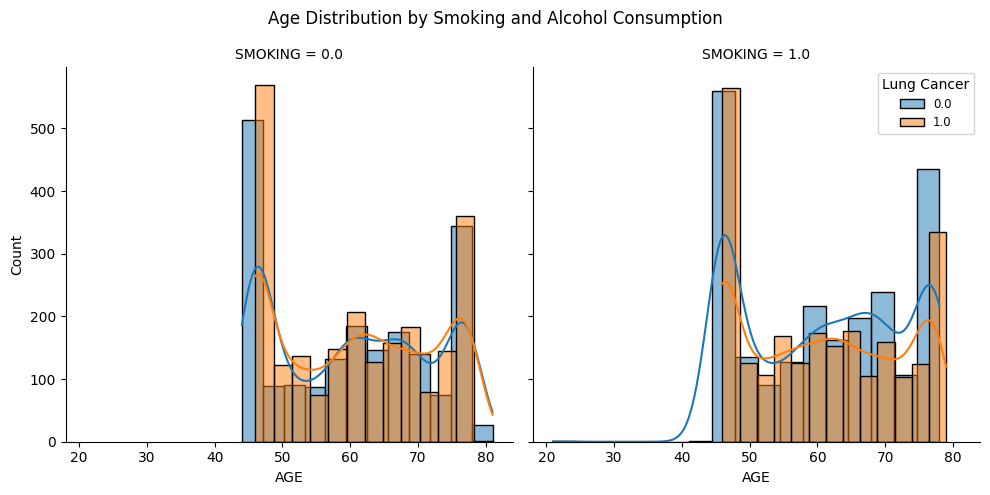

<Axes: xlabel='ALCOHOL CONSUMING'>

Text(0.5, 1.0, 'Proportion of Lung Cancer by Alcohol Consumption')

Text(0, 0.5, 'Proportion')

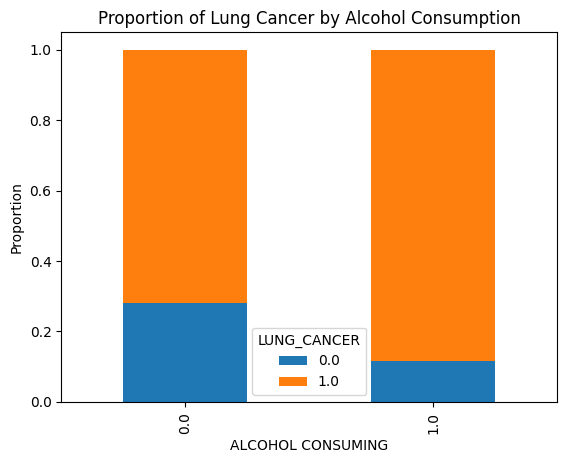

In [37]:
# Alcohol and Age
sns.boxplot(x='ALCOHOL CONSUMING', y='AGE', data=df)
plt.title('Age Distribution by Alcohol Consumption')
plt.show()

#FacetGrid of Age and Lung Cancer by Smoking
g = sns.FacetGrid(df, col="ALCOHOL CONSUMING", hue="LUNG_CANCER")
g.map(sns.histplot, "AGE", kde=True)
g.fig.suptitle('Age Distribution by Alcohol Consumption and Lung Cancer Status')
plt.legend(title='Lung Cancer', loc='upper right', fontsize='small')
plt.tight_layout()
plt.show()

#FacetGrid of Age and Alcohol Consumption by Smoking Status
g = sns.FacetGrid(df, col="SMOKING", hue="ALCOHOL CONSUMING", height=5)
g.map(sns.histplot, "AGE", kde=True)
g.fig.suptitle('Age Distribution by Smoking and Alcohol Consumption')
plt.legend(title='Lung Cancer', loc='upper right', fontsize='small')
plt.tight_layout()
plt.show()

# Create a cross-tab to count occurrences
smoking_lung_cancer = pd.crosstab(df['ALCOHOL CONSUMING'], df['LUNG_CANCER'], normalize='index')

# Plot a stacked bar chart
smoking_lung_cancer.plot(kind='bar', stacked=True)
plt.title('Proportion of Lung Cancer by Alcohol Consumption')
plt.ylabel('Proportion')
plt.show()

<Axes: xlabel='LUNG_CANCER', ylabel='ALCOHOL CONSUMING-SMOKING-ANXIETY'>

Text(0.5, 1.0, 'Heatmap of Risk Factors and Lung Cancer')

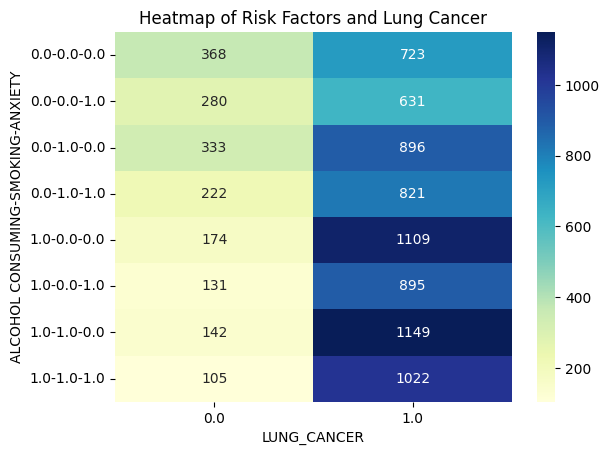

In [29]:
# Create a cross-tab for categorical variables
heatmap_data = pd.crosstab([df['ALCOHOL CONSUMING'], df['SMOKING'], df['ANXIETY']], df['LUNG_CANCER'])

# Plot the heatmap
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Risk Factors and Lung Cancer')
plt.show()